# Introduction to OpenCV
## Computer Vision and Image Processing - Lab Session 2
### Prof: Luigi Di Stefano, luigi.distefano@unibo.it
### Tutor: Andrea Amaduzzi, andrea.amaduzzi4@unibo.it - Iacopo Curti, iacopo.curti2@unibo.it

## 1. OpenCV

OpenCV (Open source computer vision) is a library of programming functions mainly aimed at real-time computer vision.

The library has more than 2500 optimized algorithms, which includes a comprehensive set of both classic and state-of-the-art computer vision and machine learning algorithms. These algorithms can be used to detect and recognize faces, identify objects, classify human actions in videos, track camera movements, track moving objects, extract 3D models of objects, produce 3D point clouds from stereo cameras, stitch images together to produce a high resolution image of an entire scene, find similar images from an image database, remove red eyes from images taken using flash, follow eye movements, recognize scenery and establish markers to overlay it with augmented reality, etc.

To import the library in your python program:

In [3]:
import cv2

To test if your import succeds, we can print each library version number:

In [5]:
print("The OpenCV version is:", cv2.__version__)

The OpenCV version is: 4.10.0



We need to import also **NumPy** and **Matplotlib** to work and display images in Python:

In [9]:
import numpy as np
from matplotlib import pyplot as plt

# Only for jupyter notebook visualization
%matplotlib inline 

## 2. Load an image

First of all we learn to download media files to have some image data to work on. 

* Download "bologna_team.jpg" from https://virtuale.unibo.it/. You should find it in the chapter *"Laboratory slides and materials"* in "LabSession2.zip".
* Move it inside the folder of the notebooks (or change the image path in the notebook accordingly).

With the following snippet you will load the image:


In [13]:
image = cv2.imread('bologna_team.jpg')

The function **cv2.imread(*filename*)** load the image from the *filename* path. Although in this case we passed the **relative path** to the folder where you have the notebooks, you can pass also the **absolute path** to the image.

#### What is an image under the hood in Python?

In [17]:
print(type(image))

<class 'numpy.ndarray'>


* In C++, OpenCV employs its Mat matrix structure
* But in **Python**, OpenCV represents images as **NumPy n-dimensional arrays**

Since images are NumPy arrays, you are able to use all NumPy methods also on images.

For example we can print the shape of the image as we do with numpy arrays:

In [21]:
print(image.shape)

(1260, 2240, 3)


The shape in case of images represents the **Height** and the **Width** of the image, along with the numbers of **channels**.

In this case your image has an **Height = 549**, a **Width = 910** and **Channels = 3**. The shape *(H,W,C)* is a **Tuple**.


In [24]:
# Printing height width and channels separately
height = image.shape[0]
width = image.shape[1]
ch = image.shape[2]

print("The Height is:",height)
print("The Width is: ",width)
print("The Number of Channels is: ",ch)

The Height is: 1260
The Width is:  2240
The Number of Channels is:  3


Moreover, if you want to get the bit-depth (the number of bits per pixel) of an image you can print the dtype of the array.

In [27]:
print(image.dtype)

uint8


Images have usually 8-bit depth, therefore, each pixel contains a value from 0 to 255 (i.e. uint8).

## 3. Display the image

Using Matplotlib we are able to display the image:

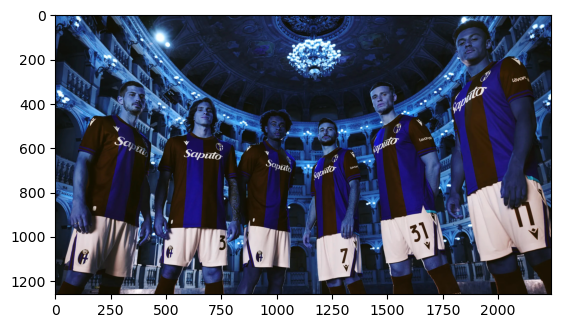

In [32]:
plt.imshow(image)
plt.show()

Why are the colors strange? 

Usually, colored images have 3 channels: **Red**, **Green** and **Blue** (**RGB**). Matplotlib requires images in this format to display them correctly. 

On the other hand, OpenCV loads images as **Blue**, **Green** and **Red** (**BGR**). 

It is just a convention. So if you want to  plot images with original colors using the library **matplotlib**, you need a conversion!

In [35]:
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

And then, plot the new version:

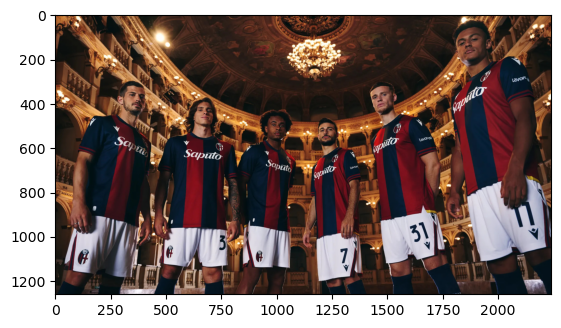

In [38]:
plt.imshow(image_rgb)
plt.show()

The function **cv2.cvtColor(*image*,*converstion_type*)** will return the modified version of the original *image* applying the conversion represented by *converstion_type*. In this case the *converstion_type* is **cv2.COLOR_BGR2RGB** that means a converstion from BGR to RGB. 

You can also set the figure dimension using **plt.figure(figsize=(height_value, width_value))**.

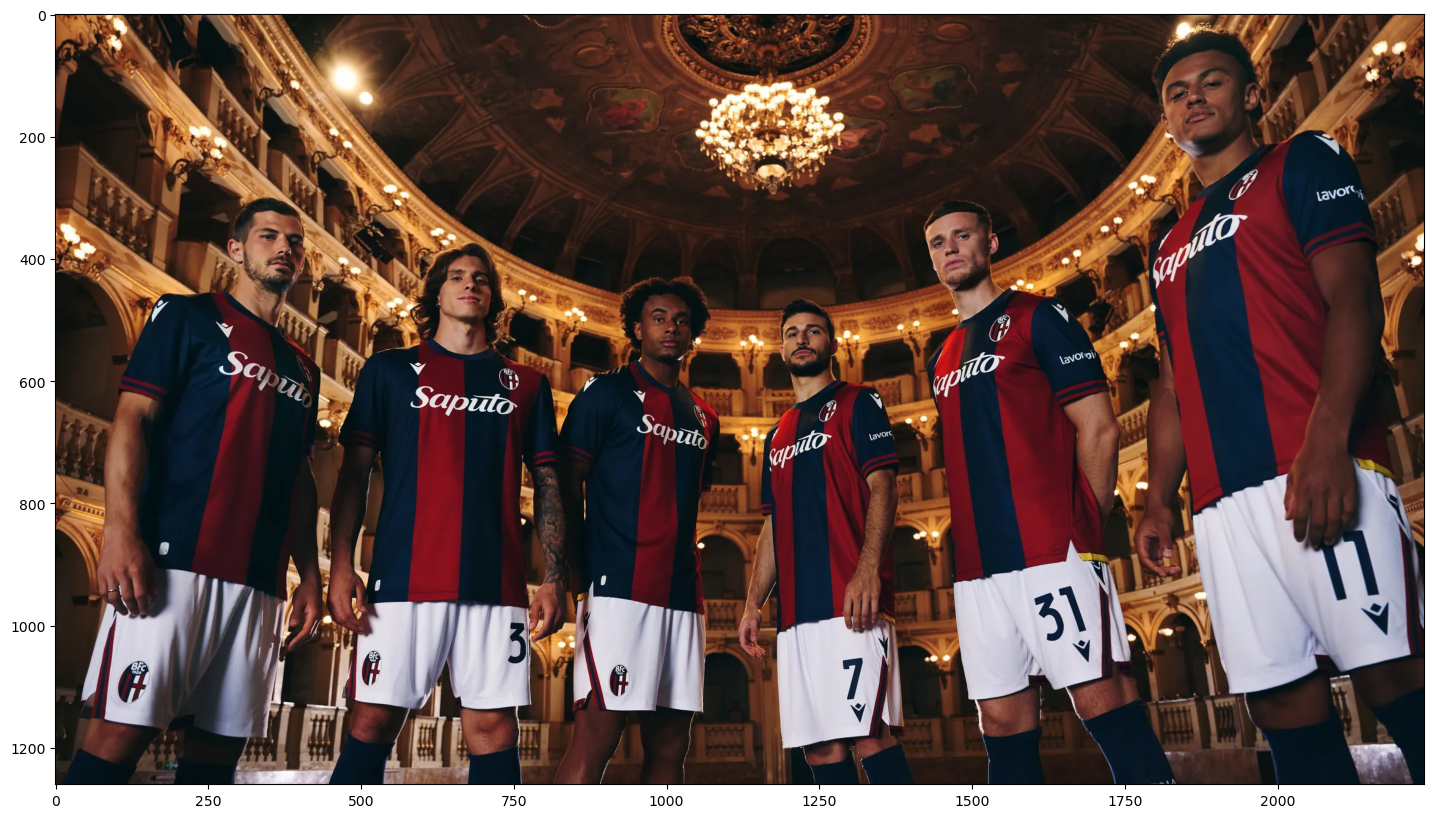

In [42]:
plt.figure(figsize=(20, 10)) # (20,10) is the maximum allowed figure size.
plt.imshow(image_rgb) # imshow changes the figure size to mantain the image's aspect ratio.
plt.show()

## 4. Access Image Pixels

In Python a 2D image is represented as a Matrix. Each element of the matrix represents one **pixel**. Since a color image has 3 channels per pixel, our representation is not a simple Matrix, but is 3-dimensional array called **Tensor**.

So let's try to access one random pixel. For example one belonging to the Zirkzee's shirt:

In [46]:
zirkzee_pixel = image[750,1000]
print("The pixel value is:",zirkzee_pixel)

The pixel value is: [19 16 55]


With the previous notation we accessed to the pixel with *row=750*, *column=1000*. 

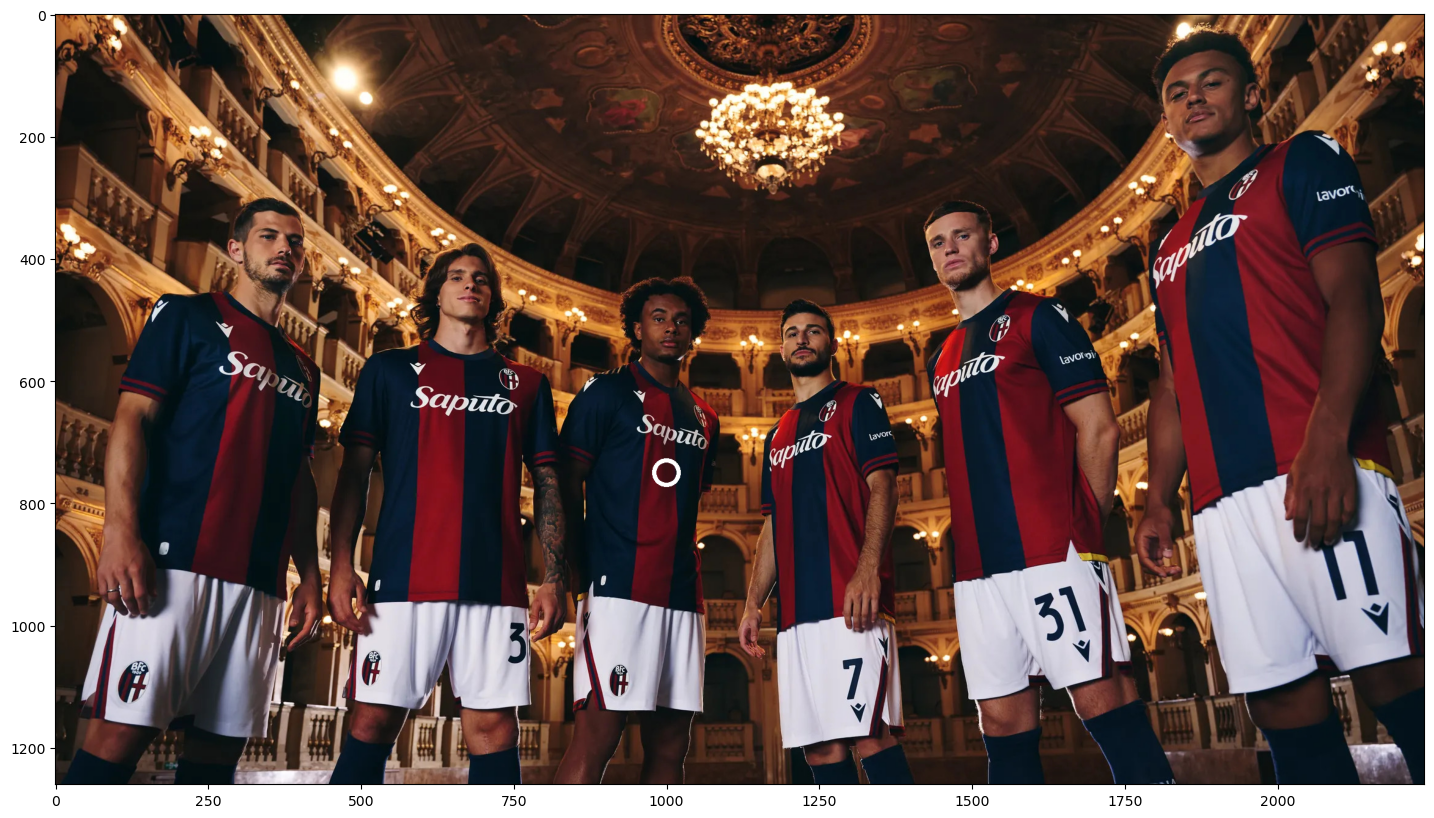

In [63]:
# !!!Only for visualization!!!

# Drawing a white circle around the selected pixel
# We first create a copy of the image to do the drawings without changing the original image
image_copy = np.copy(image)
cv2.circle(image_copy , (1000,750), 20 ,[255, 255, 255], 5)
plt.figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(image_copy,cv2.COLOR_BGR2RGB))
plt.show()

# !!!Only for visualization!!!

A RGB image has 3 values per pixel representing the red, green and blue channels.

In [66]:
# Accessing blue, green and red values of the pixel

blue = zirkzee_pixel[0]
green = zirkzee_pixel[1]
red = zirkzee_pixel[2]

print("The BGR value of the pixel is: B={},G={},R={}".format(blue,green,red))

The BGR value of the pixel is: B=19,G=16,R=55


As expected, the dominant color is **red** so the *red* value is higher than the *blue* and *green* values. What about a blue pixel of Freuler's shirt?

In [69]:
# Pixel vector
freuler_pixel = image[650,240]

# Separated colors
freuler_pixel_blue =  image[650,240,0]
freuler_pixel_green = image[650,240,1]
freuler_pixel_red =   image[650,240,2]

print("The BGR value of the pixel is: B={},G={},R={}".format(freuler_pixel_blue,freuler_pixel_green,freuler_pixel_red))

The BGR value of the pixel is: B=55,G=32,R=10


In the previous example we have shown first of all that **Freuler shirt is blue!** .. than we used another method to access image pixels. With two indices we access the image pixel:

```
pixel = image[650,240]
```

Hence, we address each pixel component with another index:


```
red = pixel[2]
```

Or we can retrieve the pixel component directly with 3 indices:


```
pixel_red = image[650,240,2]
```







## 5. Grayscale Images vs Colored Images

In the previous sections we managed colored image only. But what about grayscale images? 

First of all, download *"orsolini.png"*. You should find it in the chapter *"Laboratory slides and materials"* in "LabSession2.zip". Move it to notebooks folder. 

To load a grayscale image we need to add **cv2.IMREAD_GRAYSCALE** in our **cv2.imread()** function otherwise OpenCV load a 3 channel colored image by default:

In [74]:
# Loading a Grayscale image
grayscale_image = cv2.imread('orsolini.png', cv2.IMREAD_GRAYSCALE)

print("The shape of this Grayscale Image is:", grayscale_image.shape)

The shape of this Grayscale Image is: (1080, 1080)


**N.B.** Grayscale images have only **1 channel** so when loading them we will have no 3rd dimension in our array! 

Let's show the image (we add the 3 arguments *cmap='gray', vmin=0, vmax=255* to tell the plot library that is a grayscale picture with values from 0 to 255):

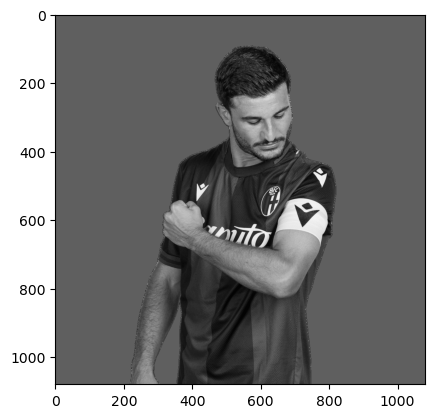

In [88]:
plt.imshow(grayscale_image, cmap='gray', vmin=0, vmax=255)
plt.show()

So what about Pixels now? Each pixel now is not a vector anymore, but a single intensity value between 0-255.

In [91]:
print(grayscale_image[0,0])

95


**N.B** Remember that a pixel value of 0 is **Black** and a value of 255 is **White**.

Sometimes we want to convert color images into grayscale images. To do so we can use **cv2.cvtColor()** with a different flag:

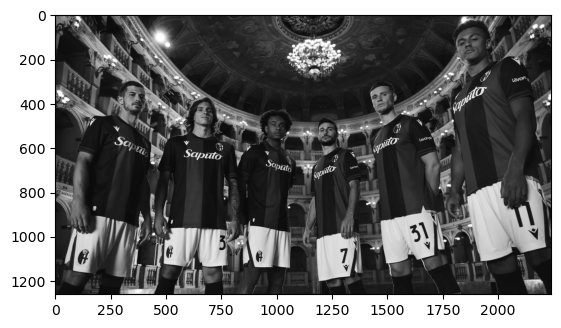

In [103]:
image_color2grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image_color2grayscale, cmap='gray', vmin=0, vmax=255)
plt.show()

## 6. Access R, G, B channels separately

In colored images each channel R,G,B can be seen as a single R,G,B image and you can plot it independetly. 

If we want to access the three channels separately we can do it easily using slicing (same as Numpy arrays!).

In the following code we will extract the 3 channels representing the R,G,B values of the image and we will plot them in three different grayscale images:

In [107]:
R = image_rgb[:,:,0] # Getting the first axis, Red
G = image_rgb[:,:,1] # Getting the second axis, Green
B = image_rgb[:,:,2] # Getting the third axis, Blue

# Each channel can be seen as a grayscale image
print(R.shape, G.shape, B.shape)

(1260, 2240) (1260, 2240) (1260, 2240)


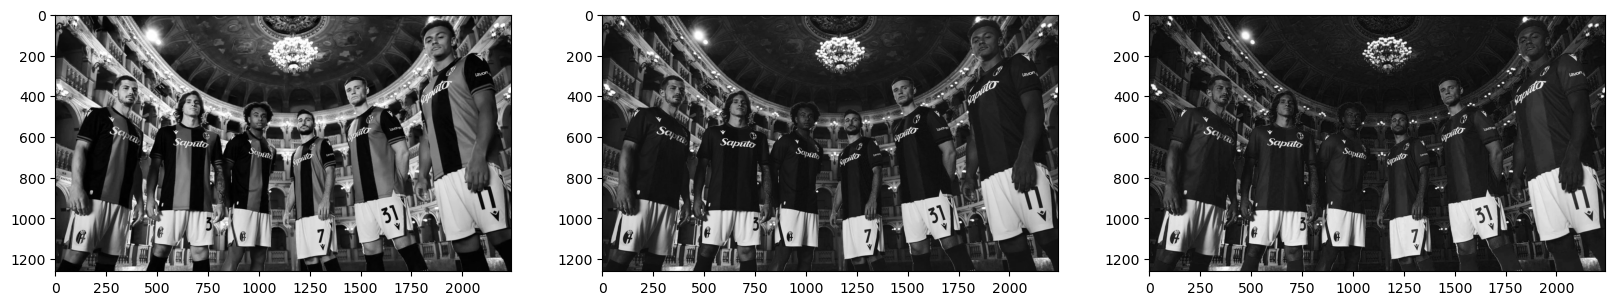

In [113]:
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
plt.imshow(R, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,3,2)
plt.imshow(G, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,3,3)
plt.imshow(B ,cmap='gray', vmin=0, vmax=255)
plt.show()

In the image above you cannot disambiguate the three images because the 3 axis contain similar information. But let us try with a completely green image: 

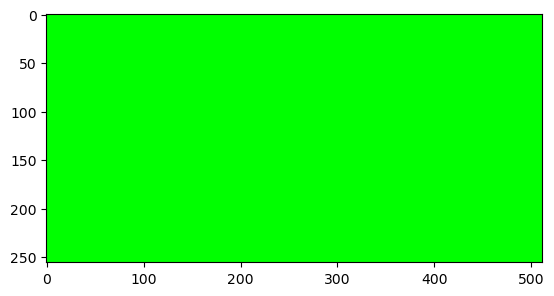

In [116]:
green_image_bgr = cv2.imread("green.png") # BGR by default
green_image_rgb = cv2.cvtColor(green_image_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(green_image_rgb)
plt.show()

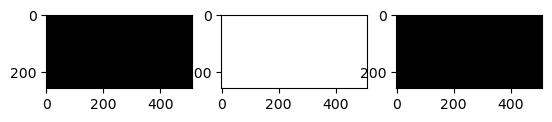

In [118]:
R = green_image_rgb[:,:,0] # Getting the first axis, Red
G = green_image_rgb[:,:,1] # Getting the second axis, Green
B = green_image_rgb[:,:,2] # Getting the third axis, Blue

plt.subplot(1,3,1)
plt.imshow(R, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,3,2)
plt.imshow(G, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,3,3)
plt.imshow(B ,cmap='gray', vmin=0, vmax=255)
plt.show()

**Only the Green channel has values greater than 0!**
This is because only G channel has meaningful values different from 0.

**N.B.** Now that we know how to extract channels, we could perform the BGR to RGB conversion simply by splitting the channels and than concatenating them in the inverse order along the third dimension using **Numpy** methods. 

We can use **np.stack([R,G,B], axis=2)** to do that.

B, G and R shapes : (1260, 2240) (1260, 2240) (1260, 2240)
image_rgb shape :  (1260, 2240, 3)


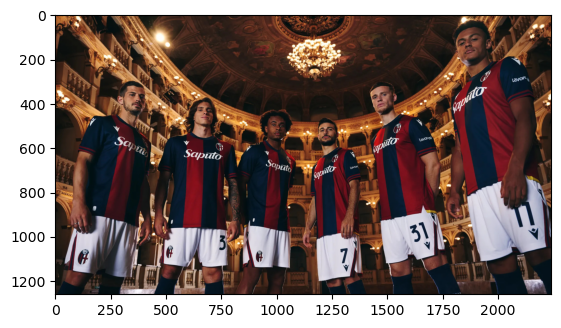

In [122]:
# Stacking B,G,R along the axes of channels (axis=-1, last channel).

B = image[:,:,0] # Getting the first axis, Red
G = image[:,:,1] # Getting the second axis, Green
R = image[:,:,2] # Getting the third axis, Blue

image_rgb = np.stack([R,G,B], axis=-1) # Axis specifies the position of the new axis. -1 means last position. 
print('B, G and R shapes :',B.shape, G.shape, R.shape)
print('image_rgb shape : ',image_rgb.shape)

plt.imshow(image_rgb)
plt.show()

## 7. Access Image Region of Interests (ROIs)

In the previous section we have seen how to access to single pixels. But what about a bigger portion of the image?
We just need to do **slicing** as for all numpy arrays! 
For example if we want to extract Calafiori from the starting image, what slicing do we need?

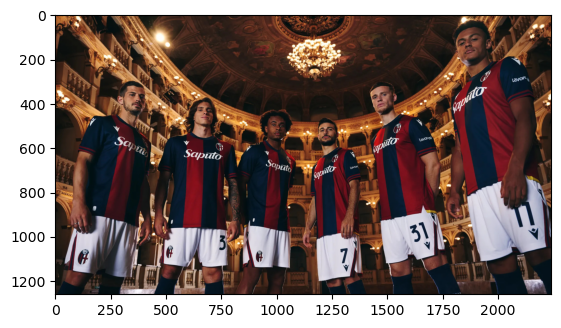

In [126]:
# Displaying starting image
plt.imshow(image_rgb)
plt.show()

To cut out **Calafiori** of the image we need to perform the following slice:

In [129]:
calafiori = image_rgb[100:,400:820]

In the example above we accesed the RoI going from row 100 to last row (100:) and from column 400 to column 820 (400:820) to contain all Calafiori.

**N.B.** The rows are ordered from top to bottom while the columns from left to right. 

Now let us show the selected RoI:

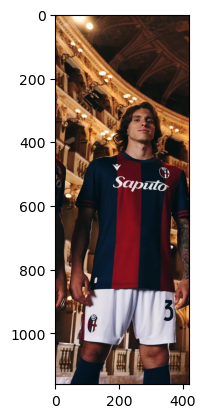

In [133]:
plt.imshow(calafiori)
plt.show()

## 8. Modify pixels and Save image

Up to now, we accessed pixels without modifying the original image.

If we want to edit the value of a single pixel of the image we could do:

In [137]:
print("Previous value: ", grayscale_image[0,0])
grayscale_image[0,0] = 255
print("New value: ",grayscale_image[0,0])

Previous value:  95
New value:  255


Tipically, before to modify images, it is raccomended to make a backup of those images. To do so, we first **copy** the images and then we perform all modifications on the copy of the images.

Moreover we can modify more than one pixel at once. For example, let us try to edit the *lenna.png* grayscale image around a pupil of the girl:

In [140]:
# Copy of the original image
copied_image = grayscale_image.copy()

# Pupil coordinates
center_row = 550
center_column = 630
radius = 50

new_color = 255 # White

copied_image[center_row - radius : center_row + radius, center_column - radius: center_column + radius] = new_color

Show the image:

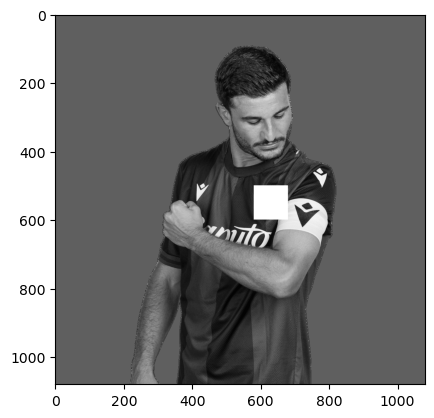

In [143]:
plt.imshow(copied_image, cmap='gray', vmin=0, vmax=255)
plt.show()

We can notice how the original image stayed unchanged:

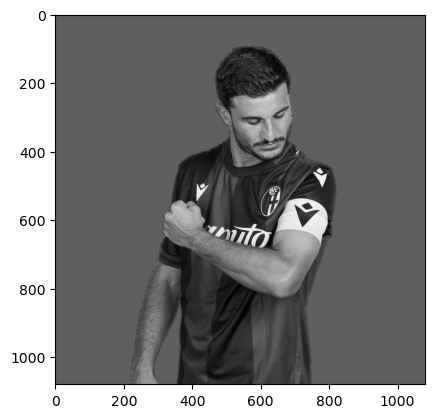

In [146]:
plt.imshow(grayscale_image, cmap='gray', vmin=0, vmax=255)
plt.show()

When you have done the modifications, you can save the image on disk.

In [149]:
cv2.imwrite("orsolini_white_logo.png", copied_image)

True

In case of **color images** if we want to modify a pixel we have to assing 3 values, one for each channel BGR:

In [152]:
copied_image_rgb = image_rgb.copy()

print("Previous value: ", copied_image_rgb[0,0])
copied_image_rgb[0,0] = [255,255,255]
print("New value: ", copied_image_rgb[0,0])

Previous value:  [162  89  44]
New value:  [255 255 255]


Same as in grayscale images we can modify more RGB pixels at once. Let us try to mask captain america assigning all white pixels to the RoI:

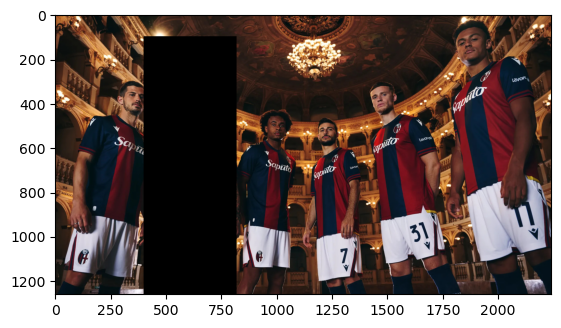

In [161]:
copied_image_rgb[100:,400:820] = np.asarray([0,0,0])
plt.imshow(copied_image_rgb)
plt.show()

In the same way of before we can save the image. With **cv2.imwrite** we can save our image with several codings such as *.png, .jpg, .bmp, etc ...*. 

**N.B** As for loading image, OpenCV expects to have a BGR image by default, but we performed the masking operation on an RGB image. Remember to convert back to BGR before saving!

In [36]:
copied_image_bgr = cv2.cvtColor(copied_image_rgb, cv2.COLOR_RGB2BGR)
cv2.imwrite("bologna_team_no_calafiori.jpg", copied_image_bgr)

True